### Load Data

In [20]:
import pandas as pd 

df = pd.read_csv("weatherHistory.csv")

In [21]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### First correlation analysis to see which numerical columns can be dropped because they dont predict the temperature


C:\Users\marcb\AppData\Local\Temp\ipykernel_41972\2187953593.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation with Temperature (C):
Temperature (C)             1.000000
Apparent Temperature (C)    0.992629
Visibility (km)             0.392847
Wind Bearing (degrees)      0.029988
Wind Speed (km/h)           0.008957
Pressure (millibars)       -0.005447
Humidity                   -0.632255
Loud Cover                       NaN
Name: Temperature (C), dtype: float64


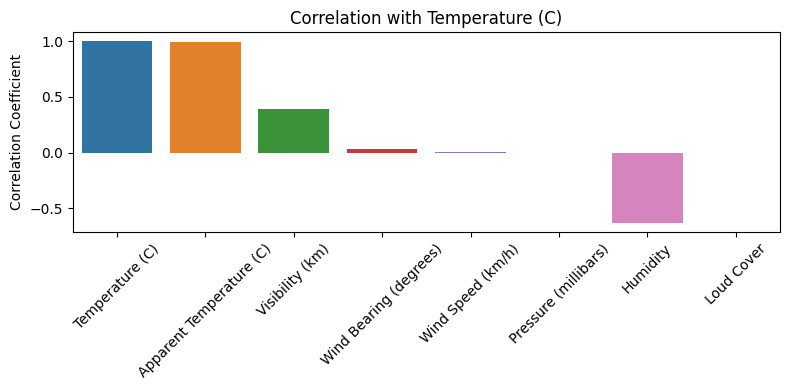

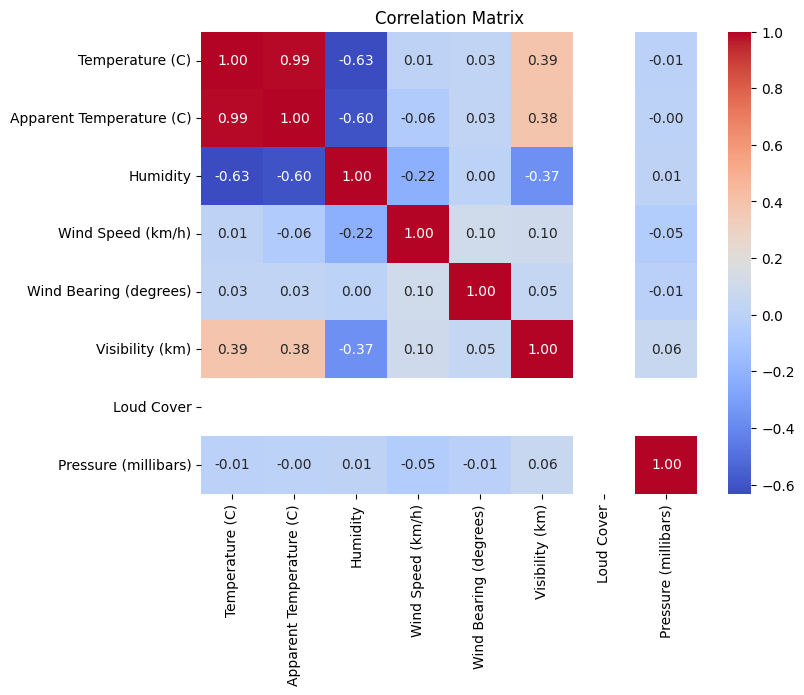

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation with Temperature (C)
temperature_corr = correlation_matrix["Temperature (C)"].sort_values(ascending=False)

# Print the correlation values
print("Correlation with Temperature (C):")
print(temperature_corr)

# Visualize the correlation as a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=temperature_corr.index, y=temperature_corr.values)
plt.title("Correlation with Temperature (C)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally: Visualize the entire correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Drop all columns that have low correlation: All of the Dates and Strings + Apparant Temperature, Wind Bearing , Wind Speed

In [23]:
df = df.drop("Formatted Date", axis=1)
df = df.drop("Summary", axis=1)
df = df.drop("Precip Type", axis=1)
df = df.drop("Apparent Temperature (C)", axis=1)
df = df.drop("Loud Cover", axis=1)
df = df.drop("Daily Summary", axis=1)
df = df.drop("Wind Speed (km/h)", axis=1)
df = df.drop("Wind Bearing (degrees)", axis=1)
df = df.drop("Pressure (millibars)", axis=1)


In [24]:
df

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


### Visualizing remaining columns and their correlation

Correlation with Temperature (C):
Temperature (C)    1.000000
Visibility (km)    0.392847
Humidity          -0.632255
Name: Temperature (C), dtype: float64


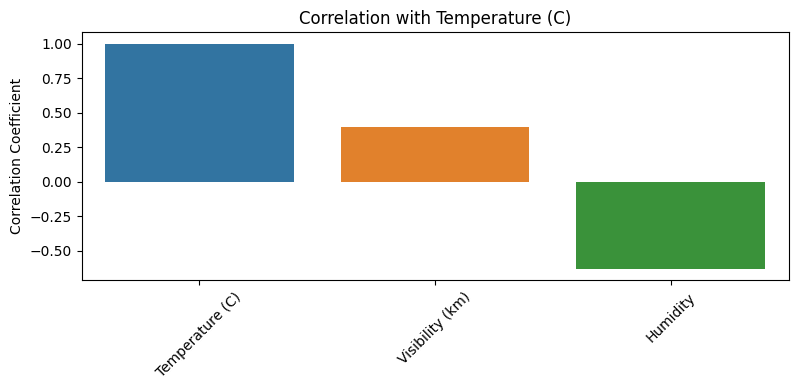

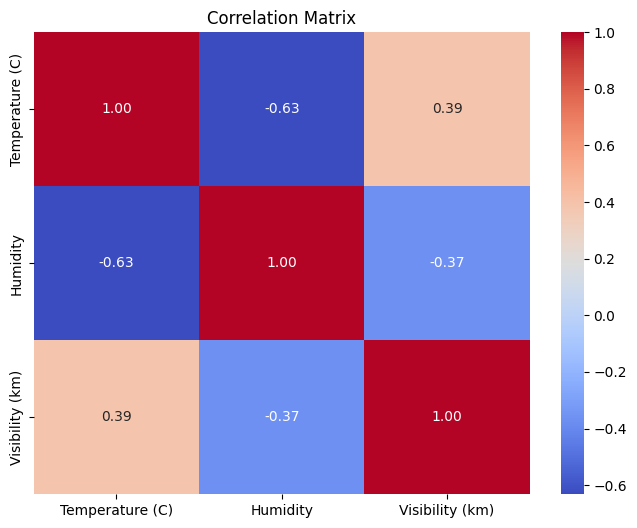

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation with Temperature (C)
temperature_corr = correlation_matrix["Temperature (C)"].sort_values(ascending=False)

# Print the correlation values
print("Correlation with Temperature (C):")
print(temperature_corr)

# Visualize the correlation as a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=temperature_corr.index, y=temperature_corr.values)
plt.title("Correlation with Temperature (C)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally: Visualize the entire correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Showing data has no missing values

In [31]:
df

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


In [34]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Temperature (C)    0
Humidity           0
Visibility (km)    0
dtype: int64


In [36]:
# Print the data type of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Temperature (C)    float64
Humidity           float64
Visibility (km)    float64
dtype: object


### Checking for outliers

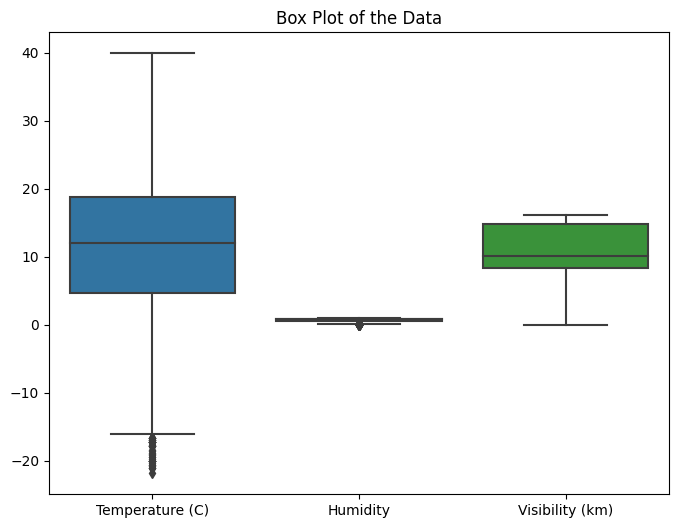

Outliers based on IQR method:

Temperature (C):
       Temperature (C)  Humidity  Visibility (km)
28104       -16.666667      0.87           6.1180
28106       -16.666667      0.87           8.0500
54843       -16.666667      0.83           4.0250
54844       -17.655556      0.90           3.5742
54845       -20.000000      0.82           1.4490
54846       -20.000000      0.78           0.6440
54847       -21.822222      0.80           1.3685
54848       -20.000000      0.78           1.4490
54849       -17.222222      0.87           1.4490
54859       -16.911111      0.87           2.7370
54860       -17.222222      0.87           2.5760
54861       -17.222222      0.83           1.4490
54862       -19.027778      0.80           0.6601
54863       -19.444444      0.78           0.6440
54864       -20.000000      0.78           0.0000
54865       -19.166667      0.81           1.0626
54866       -20.555556      0.78           1.4490
54867       -16.666667      0.83           2.5760
55

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify Outliers using IQR (Interquartile Range)
def find_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply IQR method to find outliers
outliers_iqr = find_outliers_iqr(df)

# 2. Visualize outliers with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Box Plot of the Data')
plt.show()

# 3. Display outliers based on IQR method
print("Outliers based on IQR method:")
for col, outlier_data in outliers_iqr.items():
    print(f"\n{col}:")
    print(outlier_data)


In [41]:
# 1. Identify Outliers using IQR (Interquartile Range)
def find_outliers_iqr(df):
    outlier_counts = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

# Get outliers count from IQR method
outliers_iqr = find_outliers_iqr(df)

# Print the number of outliers for each column based on IQR method
print("Number of outliers based on IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")



Number of outliers based on IQR method:
Temperature (C): 44 outliers
Humidity: 46 outliers
Visibility (km): 0 outliers


### The number of outliers is small to improve prediction accuracy there will be excluded or Croped as written in the Flowchart

In [ ]:
# Remove the rows with outliers based on IQR condition
def remove_outliers_iqr(df, outliers):
    for column, is_outlier in outliers.items():
        # Keep only the rows where the value is not an outlier
        df = df[~is_outlier]
    return df

# Exclude the outliers from the DataFrame
df_no_outliers = remove_outliers_iqr(df, outliers_iqr)

# Display the new DataFrame without outliers
print("DataFrame after excluding outliers:")
print(df_no_outliers)


DataFrame after excluding outliers:
       Temperature (C)  Humidity  Visibility (km)
0             9.472222      0.89          15.8263
1             9.355556      0.86          15.8263
2             9.377778      0.89          14.9569
3             8.288889      0.83          15.8263
4             8.755556      0.83          15.8263
...                ...       ...              ...
96448        26.016667      0.43          16.1000
96449        24.583333      0.48          15.5526
96450        22.038889      0.56          16.1000
96451        21.522222      0.60          16.1000
96452        20.438889      0.61          15.5204

[96367 rows x 3 columns]


C:\Users\marcb\AppData\Local\Temp\ipykernel_41972\313744988.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~is_outlier]


### We will now work with the df_no_outliers cleaned list. Unneccary data was removed, dat cleaned and outliers cropped. We are now ready for the training phase

In [46]:
df_no_outliers

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


### Splitting Data


In [ ]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop('Temperature (C)', axis=1)  # Features (all columns except 'Temperature (C)')
y = df_no_outliers['Temperature (C)']  # Target variable (Temperature)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Check the shape of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 77093 samples
Testing set size: 19274 samples
